In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df=pd.read_csv(r'C:\Python Portfolio Projects\Python_Diwali_Sales_Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv', encoding='unicode_escape')

In [24]:
df.shape

(11251, 15)

In [25]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [26]:
df.info

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [27]:
#drop the blank column
df.drop(['Status','unnamed1'], axis=1, inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [29]:
#checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [30]:
df.shape

(11251, 13)

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(11239, 13)

In [33]:
df['Amount']=df['Amount'].astype('int')

In [34]:
df['Amount'].dtype

dtype('int64')

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [36]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#Exploratory Data Analysis[EDA]

<Axes: xlabel='Gender', ylabel='count'>

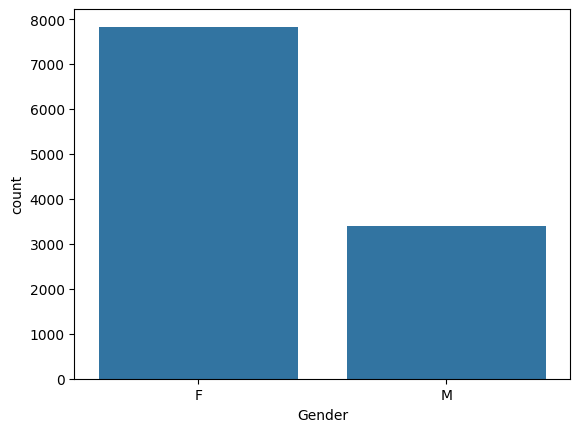

In [38]:
sns.countplot(x='Gender', data=df)

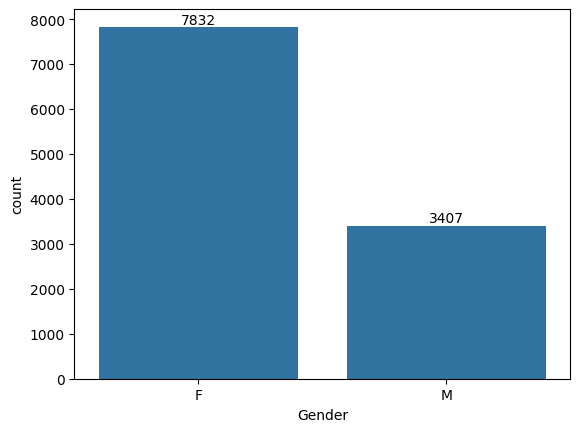

In [40]:
ax= sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

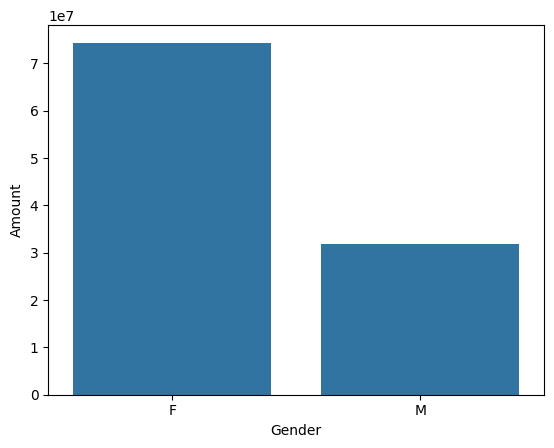

In [45]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender',y='Amount', data=sales_gen)

From the above graph the maximun purchases where made my the female buyers

#Age

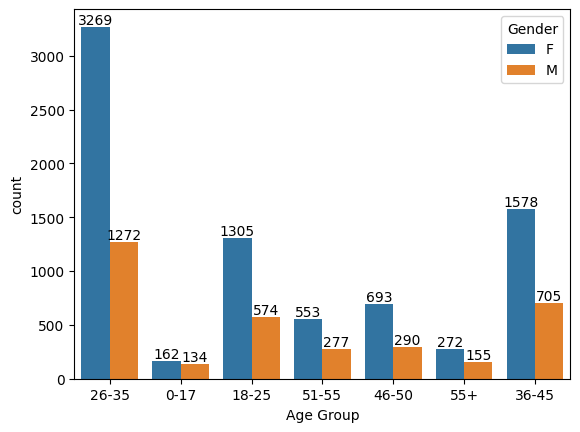

In [49]:
ax=sns.countplot(x='Age Group', hue='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Age Group', ylabel='Amount'>

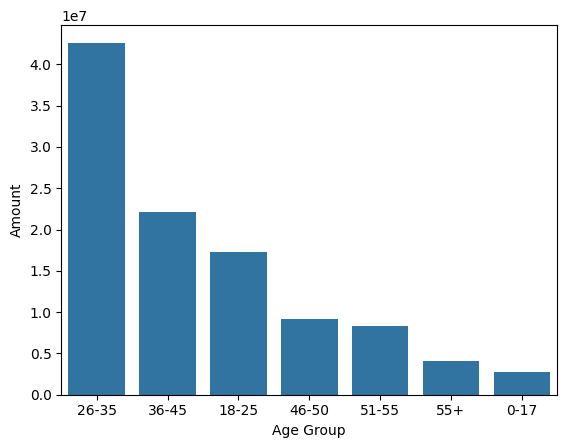

In [52]:
#Total Amount vs Age Group
sales_age= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)

##State

<Axes: xlabel='State', ylabel='Orders'>

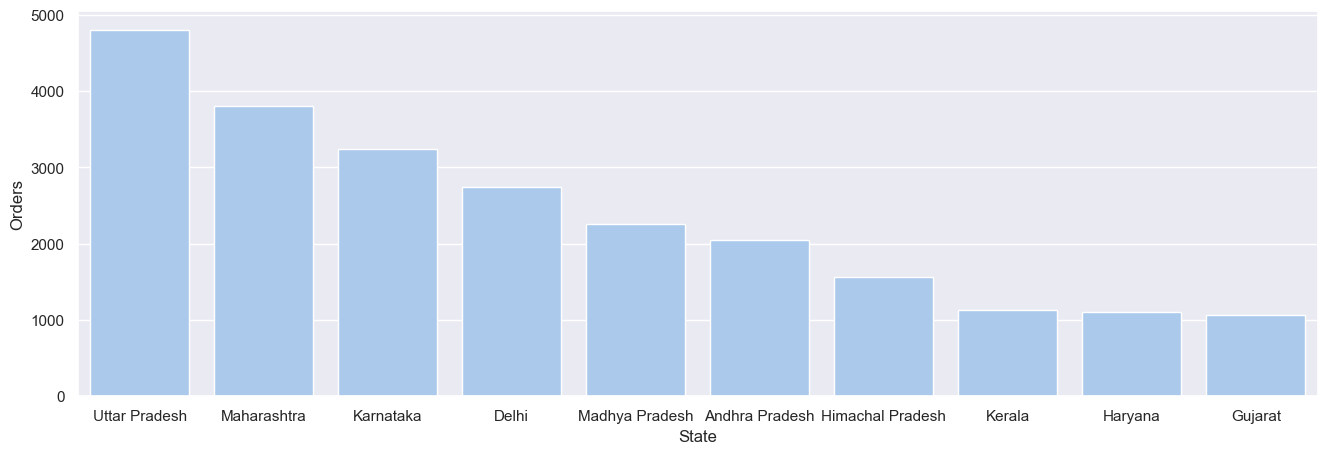

In [60]:
#Total number of orders from top 10 states
state_sales= df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.set_palette('pastel')
sns.barplot(x='State', y='Orders', data=state_sales, palete)

<Axes: xlabel='State', ylabel='Amount'>

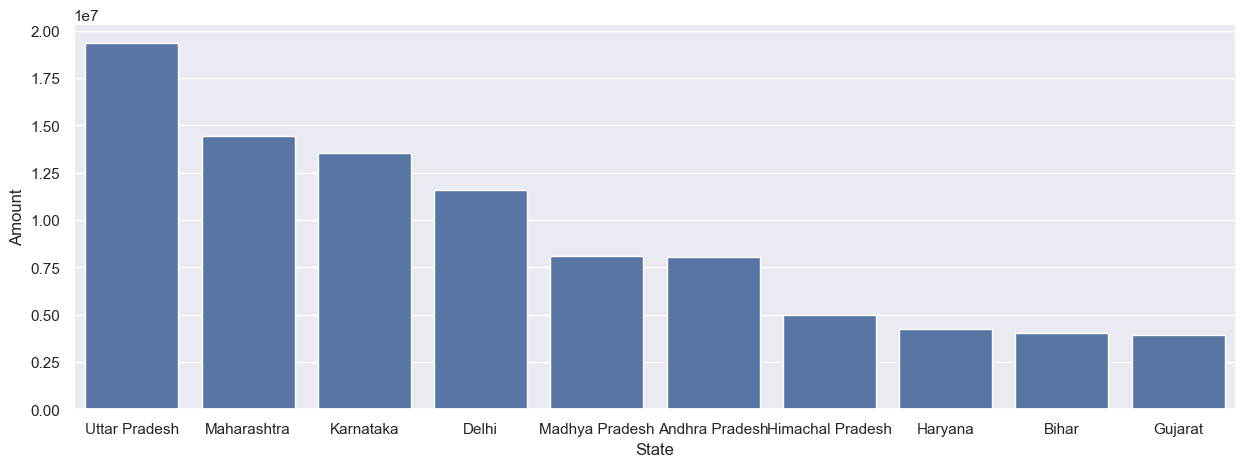

In [63]:
#total amount/sales from top 10 states
sales_amount= df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Amount', data=sales_amount)

In [ ]:
#Marital Status

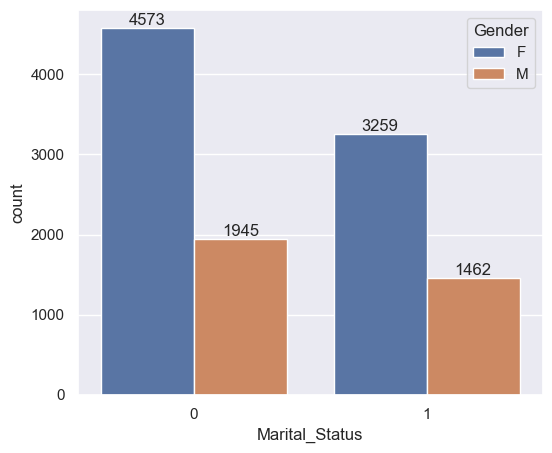

In [70]:
ax= sns.countplot(x='Marital_Status', data=df, hue='Gender')
sns.set(rc={'figure.figsize':(6,5)})

for bars in ax.containers:
    ax.bar_label(bars)

From the above figure the purchasing power is more married woman

In [ ]:
#Occupation

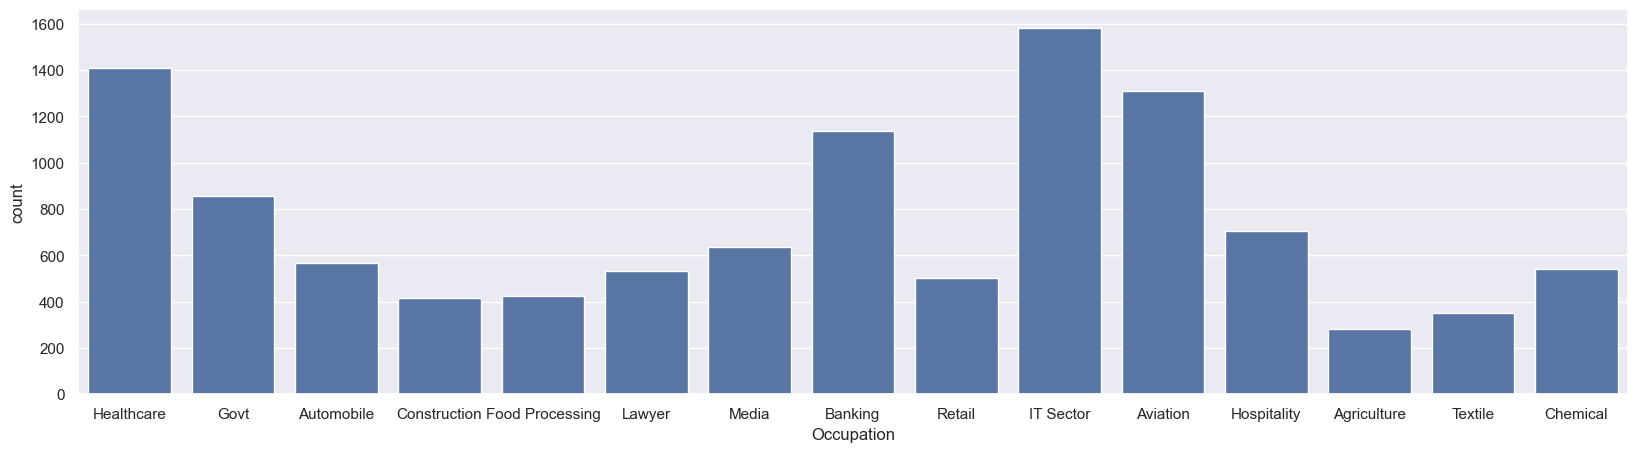

In [79]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='Occupation', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

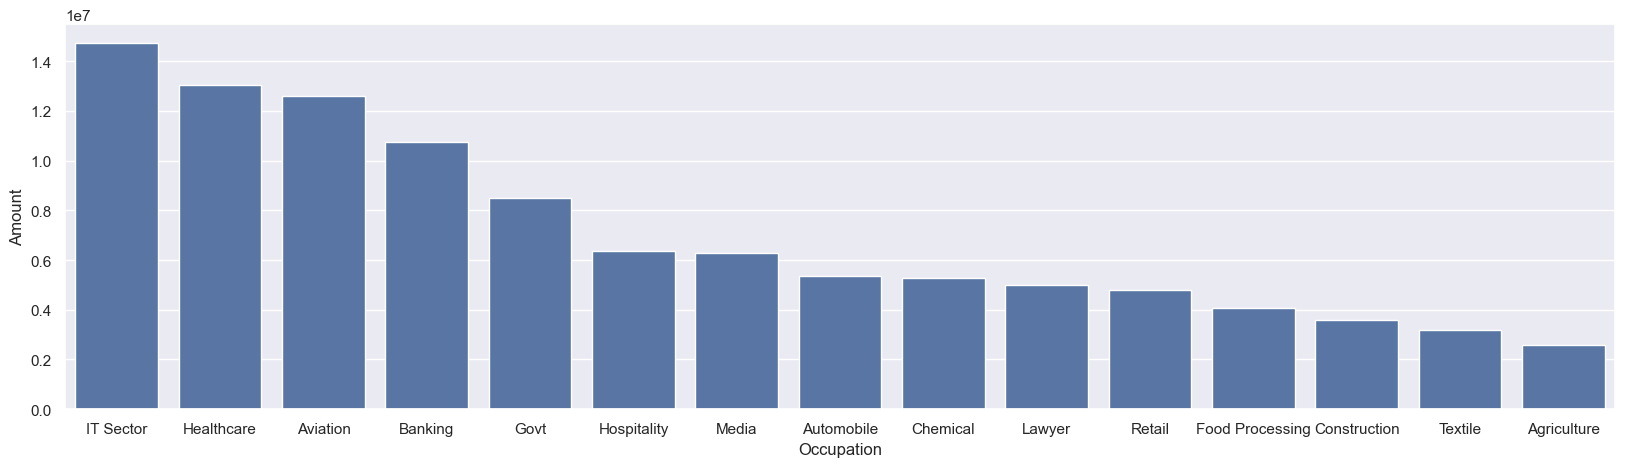

In [81]:
sales_state= df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Occupation', y='Amount', data=sales_state)

In [ ]:
#Product Category

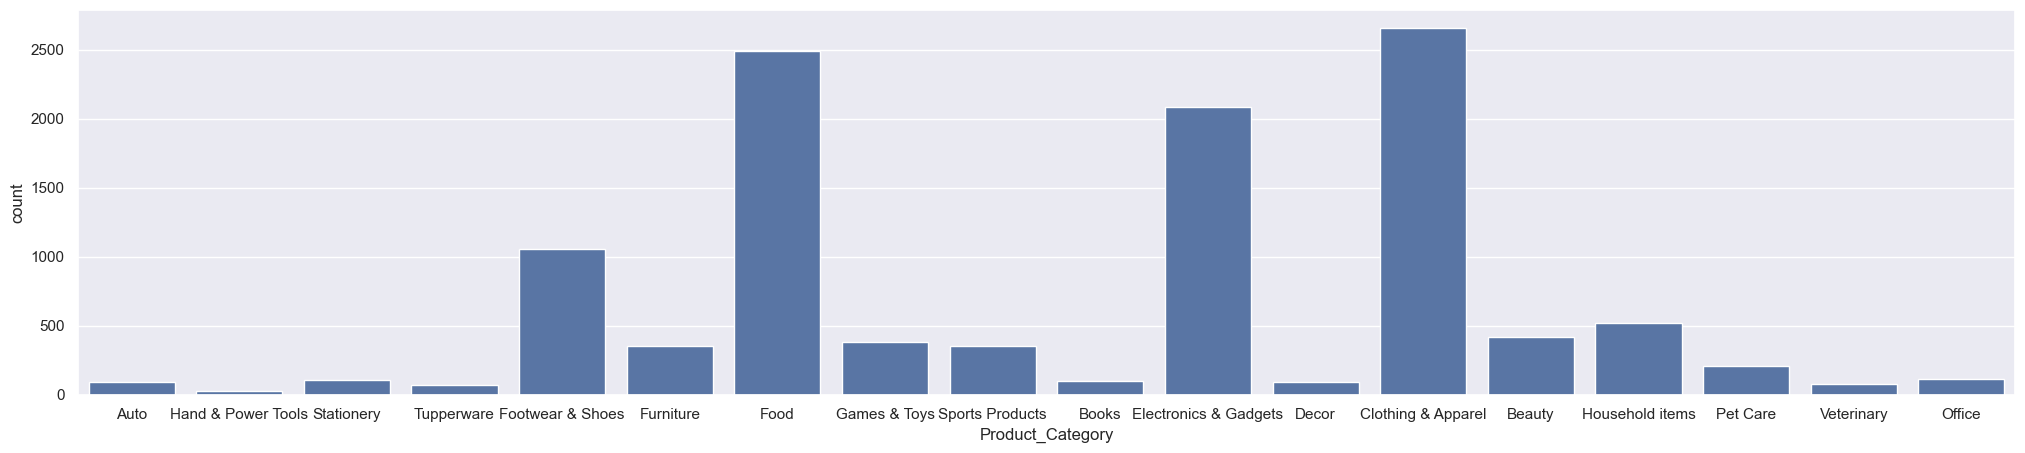

In [83]:
sns.set(rc={'figure.figsize':(25,5)})
sns.countplot(x='Product_Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

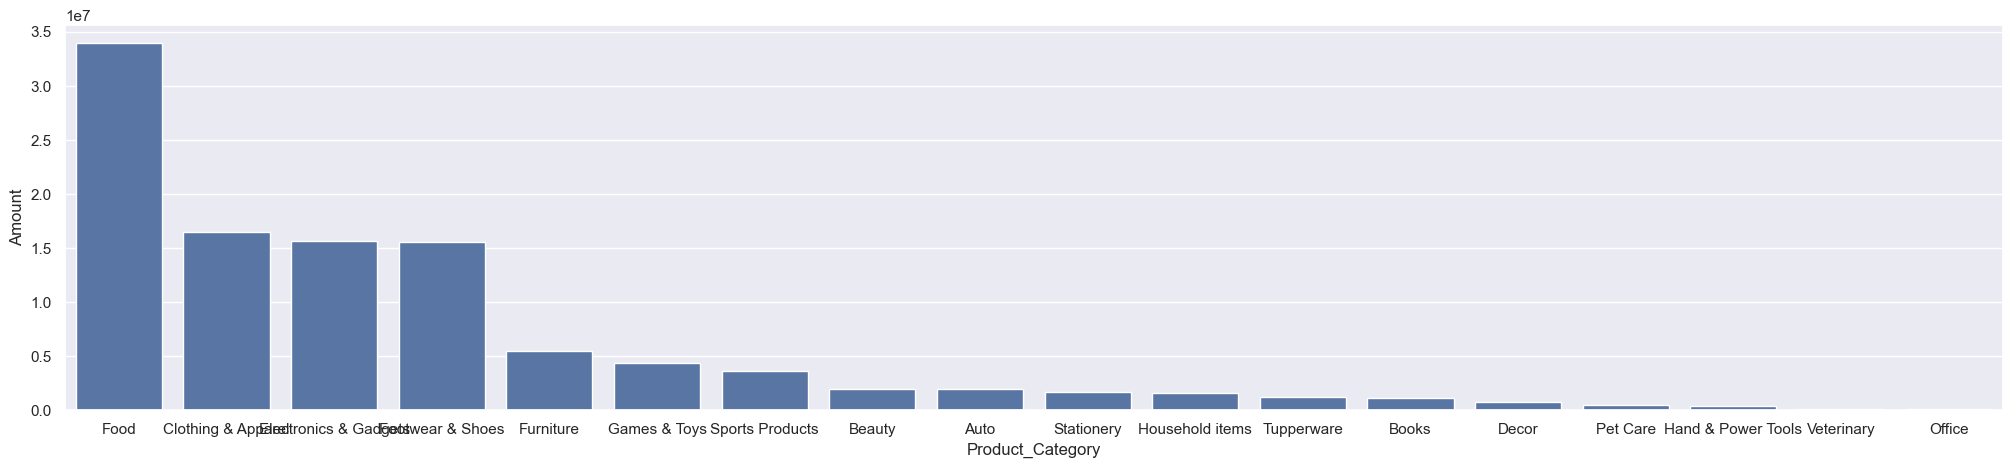

In [84]:
sales_state= df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Product_Category', y='Amount', data=sales_state)

<Axes: xlabel='Product_ID', ylabel='Orders'>

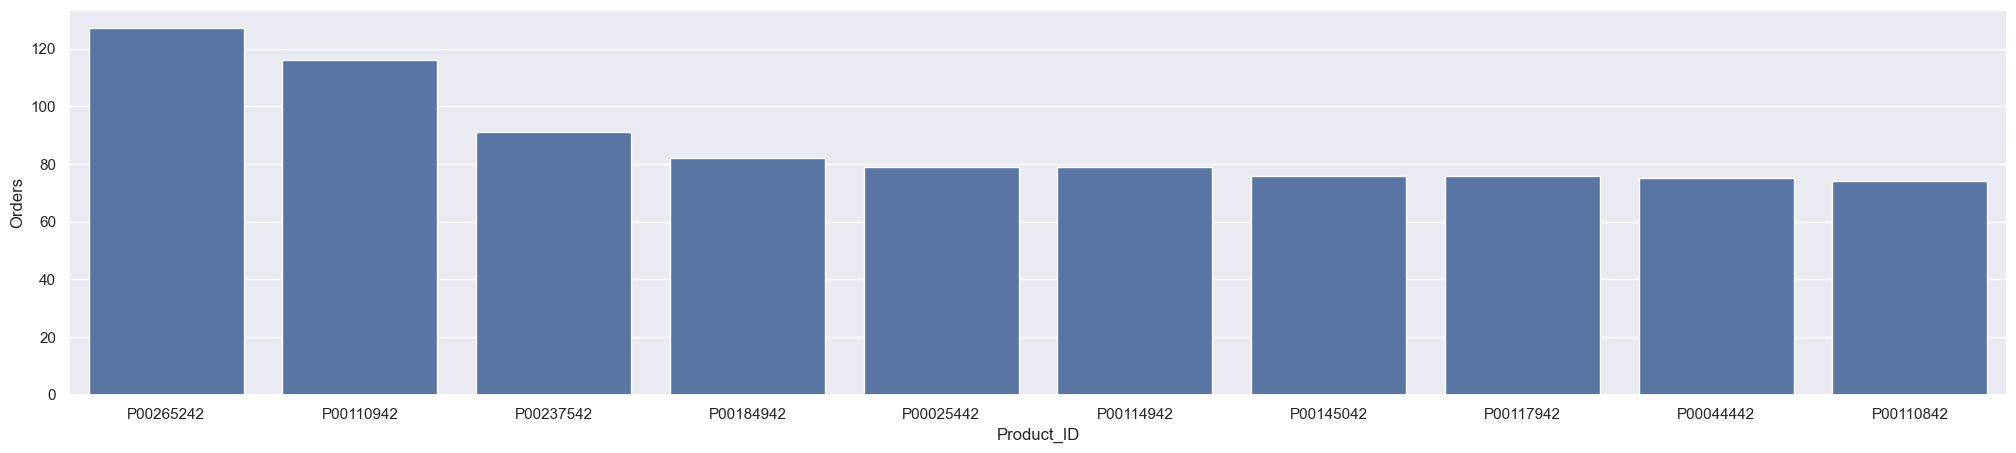

In [88]:
#Top selling products
sales_state= df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})

sns.barplot(x='Product_ID', y='Orders', data=sales_state)

<Axes: xlabel='Product_ID'>

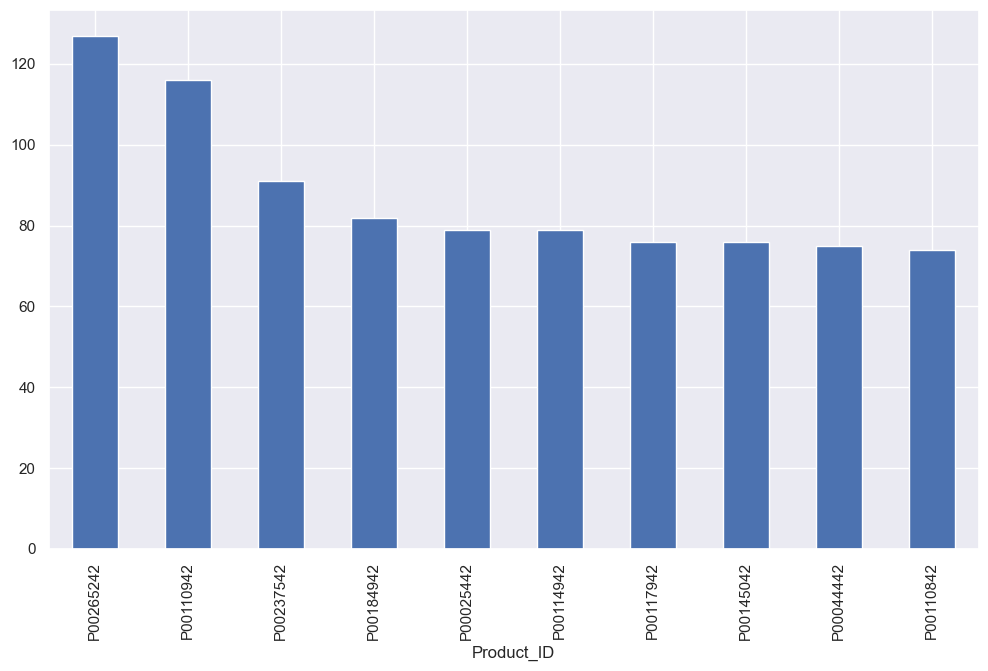

In [91]:
#Top 10 most sold products
fig1, ax1= plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

#Conclusion:
*Married woman age group 26-35 years from UP, MH, KA working in IT, healthcare and aviation are more likely buy products like,
food, clothing and electronics